In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

**Gathering Data**

In [53]:
data = pd.read_csv('dataset/nutrisnack.csv')
data.head()

,additives_n,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-uk_100g,healthy_label
0,0.0,50.00,7.81,21.88,3.12,9.4,21.88,0.000,9.0,1
1,0.0,50.00,6.25,21.88,3.12,6.2,21.88,0.438,12.0,1
2,0.0,50.00,7.81,21.88,3.12,9.4,21.88,0.000,9.0,1
3,1.0,0.00,0.00,11.38,0.00,4.1,4.07,0.233,-5.0,1
4,2.0,2.11,0.53,11.05,8.42,0.0,2.11,0.084,0.0,1


In [54]:
df = pd.DataFrame(data)

**Assessing data**


In [55]:
df.shape

(1204, 10)

1204 baris dengan 10 kolom


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   additives_n              1204 non-null   float64
 1   fat_100g                 1204 non-null   float64
 2   saturated-fat_100g       1204 non-null   float64
 3   carbohydrates_100g       1204 non-null   float64
 4   sugars_100g              1204 non-null   float64
 5   fiber_100g               1204 non-null   float64
 6   proteins_100g            1204 non-null   float64
 7   sodium_100g              1204 non-null   float64
 8   nutrition-score-uk_100g  1204 non-null   float64
 9   healthy_label            1204 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 94.2 KB


In [57]:
df.describe()

,additives_n,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-uk_100g,healthy_label
count,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000
mean,1.524086,16.050864,4.403754,29.839037,16.006570,3.287633,7.256877,0.295471,7.918605,0.569767
std,2.002555,22.447939,6.595559,27.298170,20.494723,4.944307,8.977009,0.442958,9.978532,0.495314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000
25%,0.000000,0.000000,0.000000,8.240000,1.535000,0.000000,0.497500,0.008000,-1.000000,0.000000
50%,1.000000,3.980000,0.700000,17.860000,7.395000,2.000000,4.415000,0.120500,8.000000,1.000000
75%,2.000000,25.000000,7.060000,50.000000,24.835000,4.325000,9.330000,0.438000,17.000000,1.000000
max,14.000000,100.000000,35.710000,100.000000,100.000000,31.400000,57.140000,4.500000,35.000000,1.000000


In [58]:
df.nunique()

,0
additives_n,14
fat_100g,341
saturated-fat_100g,251
carbohydrates_100g,449
sugars_100g,400
fiber_100g,112
proteins_100g,285
sodium_100g,399
nutrition-score-uk_100g,41
healthy_label,2


In [59]:
df.isnull().sum()

,0
additives_n,0
fat_100g,0
saturated-fat_100g,0
carbohydrates_100g,0
sugars_100g,0
fiber_100g,0
proteins_100g,0
sodium_100g,0
nutrition-score-uk_100g,0
healthy_label,0


In [60]:
df_cleaned = df.drop_duplicates()
print(df_cleaned)

      additives_n  fat_100g  saturated-fat_100g  carbohydrates_100g  \
0             0.0     50.00                7.81               21.88   
1             0.0     50.00                6.25               21.88   
3             1.0      0.00                0.00               11.38   
4             2.0      2.11                0.53               11.05   
5             2.0     15.22                6.52               69.57   
...           ...       ...                 ...                 ...   
1199          0.0     11.29                1.61                8.06   
1200          2.0     80.00                6.67                6.67   
1201          0.0      0.53                0.00                9.04   
1202          1.0      0.88                0.00                2.65   
1203          0.0     46.67                3.33               10.00   

      sugars_100g  fiber_100g  proteins_100g  sodium_100g  \
0            3.12         9.4          21.88        0.000   
1            3.12        

**EDA**

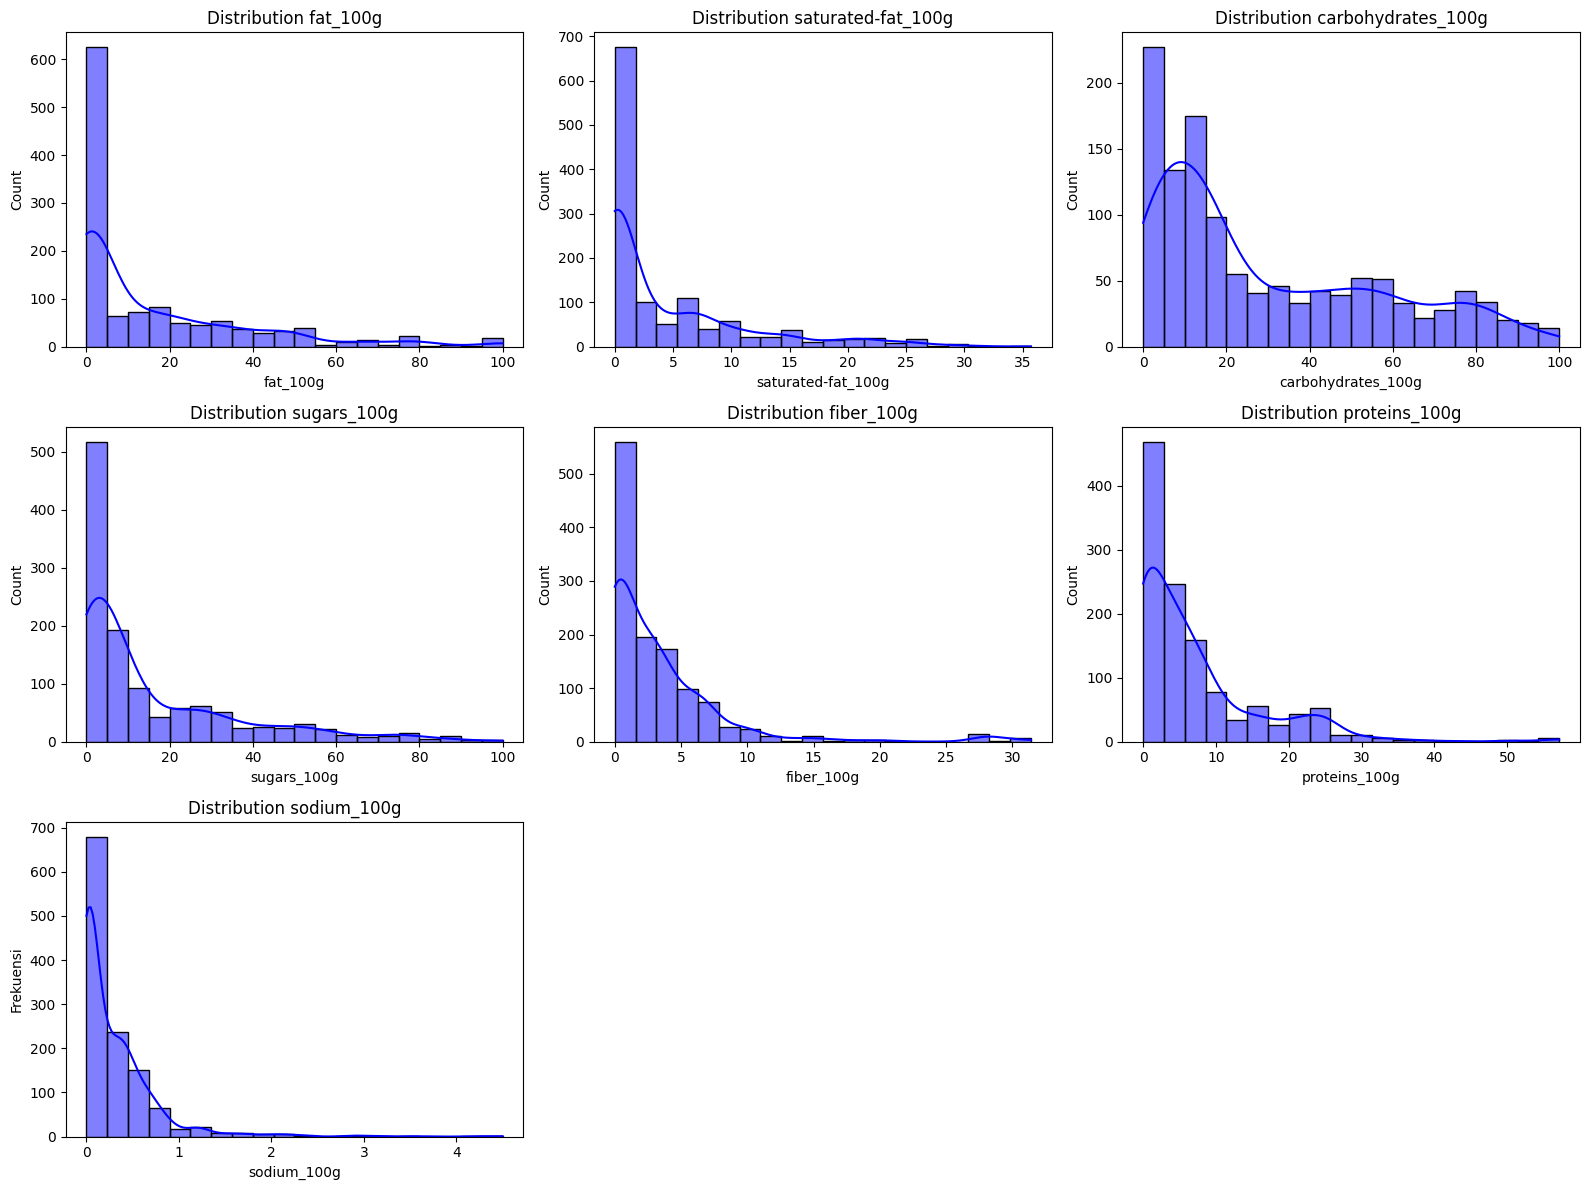

In [61]:
numerical_cols = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
                  'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution {col}')
plt.xlabel(col)
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

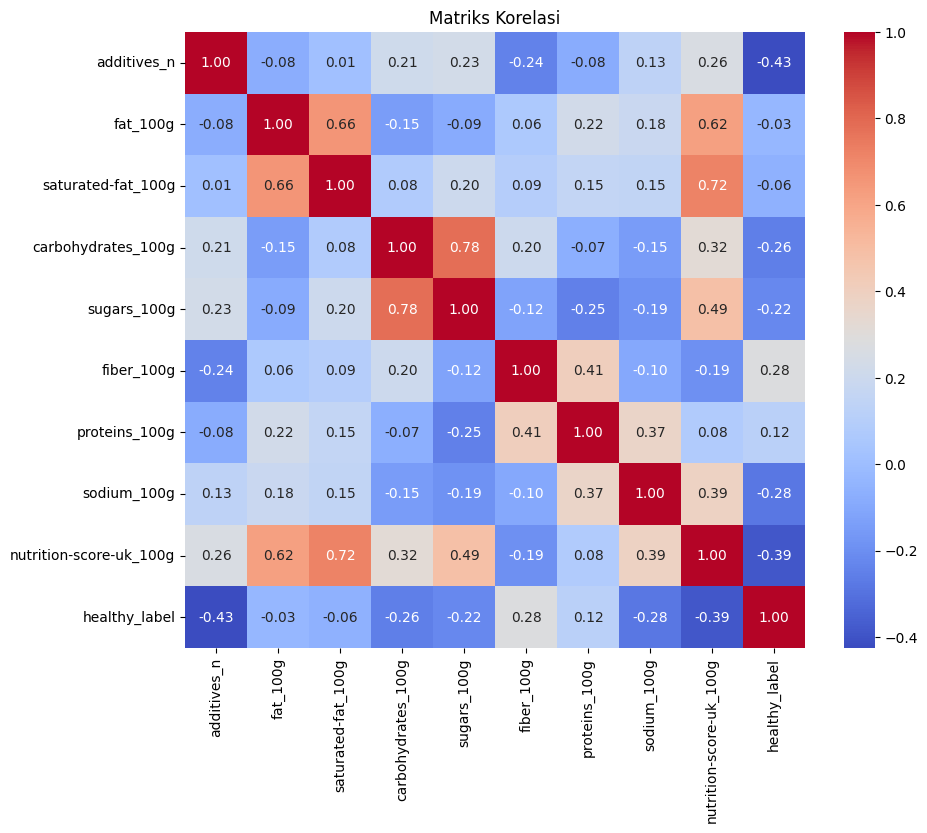

In [62]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

**Model**

In [63]:
# Separating features (X) and label (y)
X = df_cleaned[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                'proteins_100g', 'sodium_100g']]
y = df_cleaned['healthy_label']

# Normalize data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print evaluation results
print("\nEvaluation:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Save model
model.save("nutrisnack_model.h5")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6225 - loss: 0.6695 - val_accuracy: 0.7403 - val_loss: 0.6027
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7921 - loss: 0.5724 - val_accuracy: 0.7792 - val_loss: 0.5486
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8144 - loss: 0.5214 - val_accuracy: 0.7922 - val_loss: 0.5100
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.4600 - val_accuracy: 0.8117 - val_loss: 0.4801
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.4341 - val_accuracy: 0.8312 - val_loss: 0.4553
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.4509 - val_accuracy: 0.8312 - val_loss: 0.4378
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8414 - loss: 0.3907 - val_accuracy: 0.8312 - val_loss: 0.4225
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8368 - loss: 0.4065 - val_accuracy: 0.8442 - val_loss: 0.4172
Ep


Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        86
           1       0.91      0.90      0.91       107

    accuracy                           0.90       193
   macro avg       0.89      0.90      0.90       193
weighted avg       0.90      0.90      0.90       193

Accuracy: 0.90


**Predict**

In [64]:
def predict_healthiness(fat, saturated_fat, carbohydrates, sugars, fiber, sodium, proteins):
    # Create input data
    input_data = np.array([[fat, saturated_fat, carbohydrates, sugars, fiber, sodium, proteins]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input

    # Predict using the TensorFlow model
    prediction = model.predict(input_data_scaled)[0][0]

    # Determine healthiness
    health_status = "Healthy" if prediction > 0.5 else "Unhealthy"

    # Recommendation logic
    if health_status == "Healthy":
        if (24 <= sugars < 50) and (1 <= sodium < 2) and (34 <= fat < 67):
            recommendation = "Good to consume 1 time per day"
        elif (15 <= sugars < 24) and (0.7 <= sodium < 1) and (22 <= fat < 34):
            recommendation = "Good to consume 2 times per day"
        elif (0 <= sugars < 15) and (0 <= sodium < 0.6) and (0 <= fat < 22):
            recommendation = "Good to consume 3 times per day"
        else:
            recommendation = "Good to consume in moderate amounts"
    else:
        recommendation = "Better not to consume"

    return health_status, recommendation

# Example input
example_input = {
    "fat": 50,
    "saturated_fat": 7.81,
    "carbohydrates": 21.88,
    "sugars": 3.12,
    "fiber": 9.4,
    "proteins": 21.88,
    "sodium": 0
}

# Predict and display result
status, recommendation = predict_healthiness(**example_input)
print(f"Health Status: {status}")
print(f"Recommendation: {recommendation}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Health Status: Healthy
Recommendation: Good to consume in moderate amounts


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


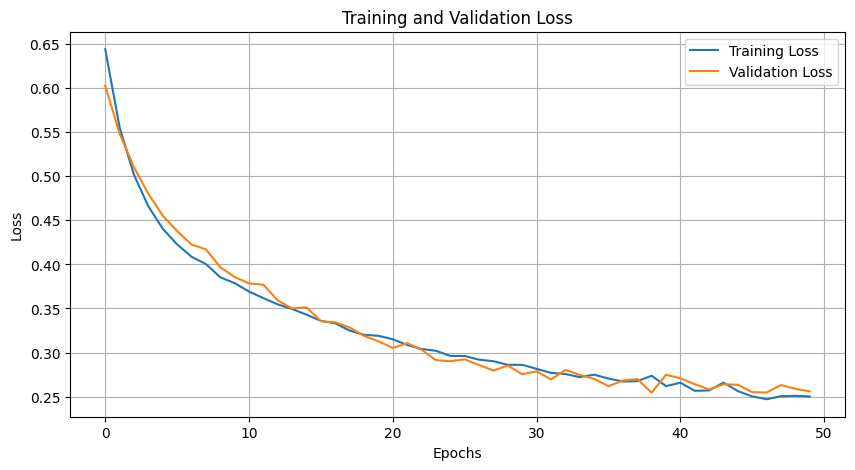

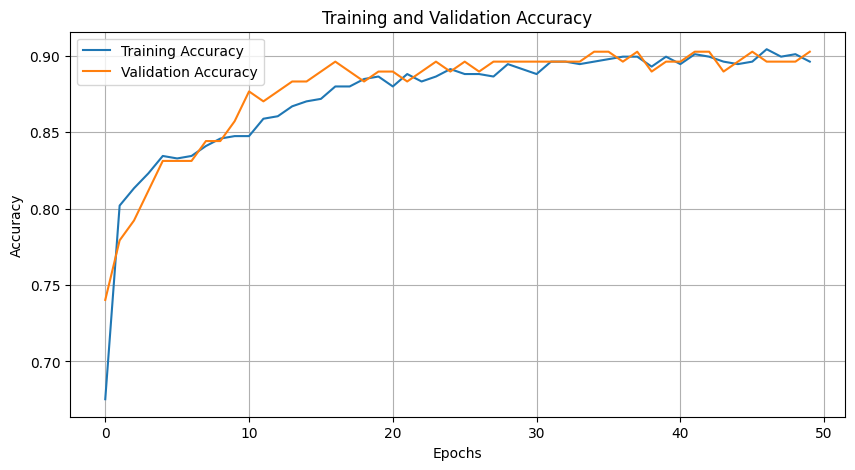

In [65]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


**Konversi Tensorflow Lite**

In [66]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('nutrisnack_model.tflite', 'wb') as f:
    f.write(tflite_model)


# Save scaler
import joblib
joblib.dump(scaler, "scaler.pkl")

print("Model berhasil dikonversi ke format TensorFlow Lite (TFLite) dan joblib.")

Saved artifact at '/tmp/tmprjic1nz4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135522314440720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135522314445648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135522314438080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135522314446880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135522314444240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135522314447936: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model berhasil dikonversi ke format TensorFlow Lite (TFLite) dan joblib.


In [67]:
import numpy as np
import tensorflow as tf
import joblib
from flask import Flask, request, jsonify

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path="nutrisnack_model.tflite")
interpreter.allocate_tensors()

# Load scaler
scaler = joblib.load("scaler.pkl")

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def predict_healthiness_tflite(fat, saturated_fat, carbohydrates, sugars, fiber, sodium, proteins):
    # Create input data
    input_data = np.array([[fat, saturated_fat, carbohydrates, sugars, fiber, sodium, proteins]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input

    # Set input tensor to the scaled input data
    interpreter.set_tensor(input_details[0]['index'], input_data_scaled.astype(np.float32))

    # Run inference
    interpreter.invoke()

    # Get prediction
    prediction = interpreter.get_tensor(output_details[0]['index'])[0][0]

    # Determine healthiness
    health_status = "Healthy" if prediction > 0.5 else "Unhealthy"

    # Recommendation logic
    if health_status == "Healthy":
        if (24 <= sugars < 50) and (1 <= sodium < 2) and (34 <= fat < 67):
            recommendation = "Good to consume 1 time per day"
        elif (15 <= sugars < 24) and (0.7 <= sodium < 1) and (22 <= fat < 34):
            recommendation = "Good to consume 2 times per day"
        elif (0 <= sugars < 15) and (0 <= sodium < 0.6) and (0 <= fat < 22):
            recommendation = "Good to consume 3 times per day"
        else:
            recommendation = "Good to consume in moderate amounts"
    else:
        recommendation = "Better not to consume"

    return {"health_status": health_status, "recommendation": recommendation}

# Setup Flask
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        fat = data.get('fat', 0)
        saturated_fat = data.get('saturated_fat', 0)
        carbohydrates = data.get('carbohydrates', 0)
        sugars = data.get('sugars', 0)
        fiber = data.get('fiber', 0)
        sodium = data.get('sodium', 0)
        proteins = data.get('proteins', 0)

        result = predict_healthiness_tflite(fat, saturated_fat, carbohydrates, sugars, fiber, sodium, proteins)
        return jsonify(result)
    except Exception as e:
        return jsonify({"error": str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
